In [64]:
import yfinance as yf
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [65]:
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

In [66]:
def calculate_returns(closing_prices):
    returns = closing_prices.pct_change()
    returns = returns.dropna() 
    return returns


In [74]:
def calculate_beta(hdfc_returns, nifty_returns):
    data = pd.concat([hdfc_returns, nifty_returns], axis=1).dropna()
    X = data.iloc[:, 1].values.reshape(-1, 1)  # NIFTY-50 returns
    y = data.iloc[:, 0].values.reshape(-1, 1)  # HDFC Bank returns
    model = LinearRegression().fit(X, y)
    beta = model.coef_[0][0]
    return beta


In [75]:
end_date = pd.to_datetime('today')
start_date = end_date - pd.DateOffset(years=5)

hdfc_ticker = 'HDFCBANK.BO'  
nifty_ticker = '^NSEI' 

In [76]:
hdfc_close_prices = fetch_stock_data(hdfc_ticker, start_date, end_date)
hdfc_returns = calculate_returns(hdfc_close_prices)
print(type(hdfc_close_prices))

nifty_close_prices = fetch_stock_data(nifty_ticker, start_date, end_date)
nifty_returns = calculate_returns(nifty_close_prices)

data = pd.DataFrame({'HDFC_Close': hdfc_close_prices, 'NIFTY_Close': nifty_close_prices})

[*********************100%%**********************]  1 of 1 completed
<class 'pandas.core.series.Series'>
[*********************100%%**********************]  1 of 1 completed


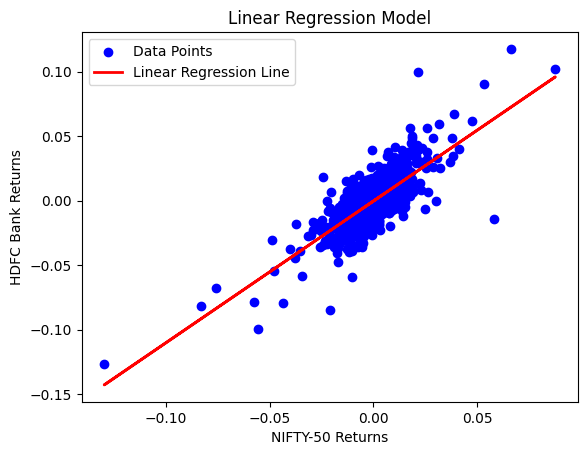

In [77]:
data = pd.concat([hdfc_returns, nifty_returns], axis=1).dropna()
X = data.iloc[:, 1].values.reshape(-1, 1)  # NIFTY-50 returns
y = data.iloc[:, 0].values.reshape(-1, 1)  # HDFC Bank returns

model = LinearRegression().fit(X, y)
plt.scatter(X, y, color='blue', label='Data Points')

plt.plot(X, model.predict(X), color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('NIFTY-50 Returns')
plt.ylabel('HDFC Bank Returns')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

In [80]:
slope_LR = model.coef_[0][0]
slope_LR

1.0979595291161452

In [70]:
beta = calculate_beta(hdfc_returns, nifty_returns)
print(f"Beta of HDFC Bank in comparison to NIFTY-50: {beta:.4f}")

Beta of HDFC Bank in comparison to NIFTY-50: 1.0980


In [71]:
data.to_csv('hdfc_nifty_prices.csv')

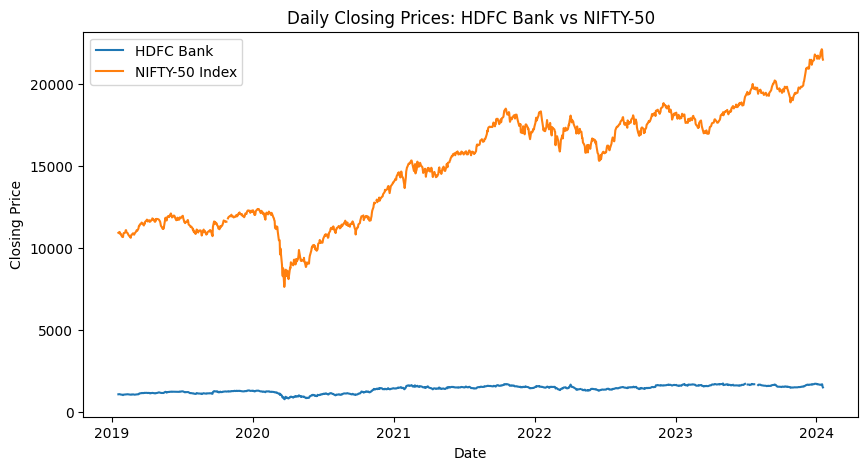

In [72]:
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['HDFC_Close'], label='HDFC Bank')
plt.plot(data.index, data['NIFTY_Close'], label='NIFTY-50 Index')
plt.title('Daily Closing Prices: HDFC Bank vs NIFTY-50')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

The content provided in this project is intended for informational and educational purposes only. It is not to be considered as financial advice, a solicitation, or an offer to buy or sell securities or other financial instruments